For cleaner viewing, the Python code inputs has been hidden. Please use the button below to show/hide the raw Python code.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/Hide Raw Code"></form>''')

# Casey Masamitsu Final Project
# Unleashing Open Data With Python | Fall 2021

## Part 1: Background Information

### **1.	(1 points) State the research question: What is the relationship between _____ and _______?**

What is the relationship between United States residents' willingness to participate in the United States Census and their political party affiliation?

### **2.	(1 points) Write a short paragraph that provides some context for the research question.  Why is this an interesting relationship to study? Why do you expect there to be a relationship?**

The United States Census determines how many voters reside in the United States and subsequently informs how many electors and representatives each state is allotted. In addition, census data is publically available and commonly used in academic research. It is of the utmost importance to understand current attitudes about the Census for these reasons. The government and private sector alike can target specific groups of people with education campaigns once individuals unlikely to participate in the Census are identified. In doing so, true representation will improve.  

### **3.	(1 points) Cite the dataset you’ll be using:**

PewResearch Center. (2020, January). January 2020 Census Survey. Pew Research Center. https://www.pewresearch.org/social-trends/dataset/2020-census-survey-1/

### **4.	(1 points) Complete Table 1.  Only include those variables you’ll be using in your analysis.**

| Variable | Definition |
| :--- | :--- |
| partic | How likely the respondent is to participate in the US Census |
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1 Definitely will participate
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 Probably will participate
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3 Might or might not participate
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4 Probably will not participate
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5 Definitely will not participate
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6 Refused
| party | The respondent’s political party
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1 Republican 
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 Democrat 
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3 Independent 
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4 Something else
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5 Refused|
| import_us | How important respondent believes census is for the United States:
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1 Very important 
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 Somewhat important 
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3 Not too important 
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4 Not at all important
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5 Refused
| import_you | Does the respondent think responding to the census would…
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1 Benefit them personally 
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 Harm them personally 
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3 Neither benefit nor harm them
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4 Refused
| import_comm | Does the respondent think responding to the census would…
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1 Benefit their community 
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 Harm their community
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3 Neither benefit nor harm their community
|| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4 Refused


## Part 2: Descriptive Information

### **5.	(2 points) Complete the table of summary statistics.  Add or delete rows as necessary.**

Below you will first see Python outputs for the describe() and value_counts() functions. Using this information, summary statistics tables were created further below. 

In [136]:
# Describe categorical variables with implicit order
pew[["partic", "import_us", "import_you", "import_comm"]].describe()

,partic,import_us,import_you,import_comm
count,3535.000000,3535.000000,3535.000000,3535.000000
mean,1.599151,1.355587,2.450636,1.644979
std,0.976086,0.681643,0.899150,0.937710
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,3.000000,1.000000
75%,2.000000,2.000000,3.000000,3.000000
max,6.000000,5.000000,4.000000,4.000000


In [137]:
# Counts of party variable
pew[["party"]].value_counts()

party
2        1267
1         970
3         895
4         330
5          73
dtype: int64

In [138]:
# Proportions of party variable
pew[["party"]].value_counts(normalize = True)

party
2        0.358416
1        0.274399
3        0.253182
4        0.093352
5        0.020651
dtype: float64

*For these four variables, generally, the higher the value, the greater lack of interest and regard for the US census.*

| Variable | Minimum | Maximum | Mean | Standard Deviation | *N* |
| :--- | :--- | :--- | :--- | :--- | :--- |
| partic | 1 | 6 | 1.59 | 0.98 | 3,535 |
| import_us | 1 | 5 | 1.36 | 0.68 | 3,535 |
| import_you | 1 | 4 | 2.45 | 0.89 | 3,535 |
| import_comm | 1 | 4 | 1.64 | 0.94 | 3,535 |

| Variable | Republican | Democratic | Independent | Something else | Refused | *N* |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| | # (%) | # (%) | # (%) | # (%) | # (%) |
| party* | 970 (27.44) | 1267 (35.84) | 895 (25.31) | 330 (9.93) | 73 (2.07) | 3,535 |

** During regression analysis, "party" was subset to only democratic (1) or not (0).*

### **6.	(2 points) Create one visualization of the dependent variable (e.g. bar graph, line graph, boxplot, histogram).  Be sure the visualization includes all the critical components, including a title, meaningful axes labels and any other useful labels.**

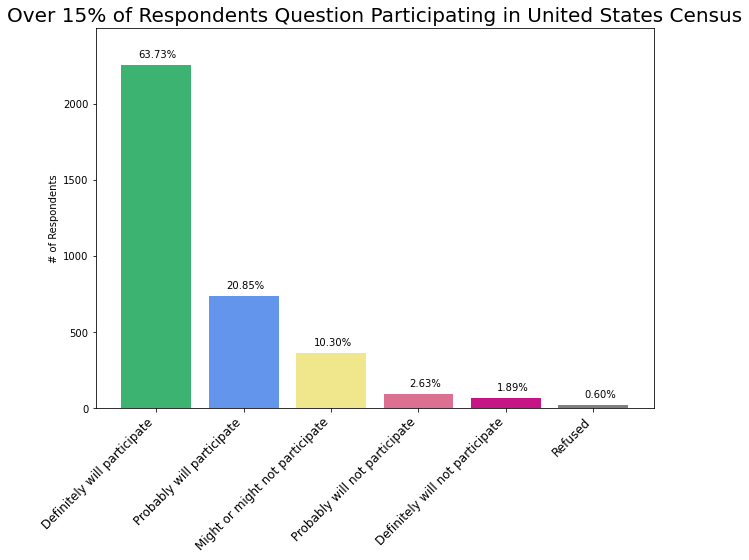

In [123]:
pew[["partic"]].value_counts()
respondents = [2253, 737, 364, 93, 66, 22]
answers = ["Definitely will participate",
          "Probably will participate",
          "Might or might not participate",
          "Probably will not participate",
          "Definitely will not participate",
          "Refused"]
plt.figure(figsize = (10,7))
plt.ylim([0,2499])
plt.bar(answers, respondents, color = ["mediumseagreen", "cornflowerblue", "khaki", "palevioletred", "mediumvioletred", "grey"])
plt.title("Over 15% of Respondents Question Participating in United States Census", fontsize = 20)
plt.ylabel("# of Respondents")
plt.xticks(rotation = 45, ha = "right", fontsize = 12)
plt.text(-0.2, 2303, "63.73%", color = "black")
plt.text(0.8, 787, "20.85%", color = "black")
plt.text(1.8, 414, "10.30%", color = "black")
plt.text(2.9, 143, "2.63%", color = "black")
plt.text(3.9, 116, "1.89%", color = "black")
plt.text(4.9, 72, "0.60%", color = "black")
plt.show()


### **7.	(1 points) Write a one-sentence summary of the visualization above.  What is something interesting about the variable that the visualization highlights?**

Over 15% of the survey respondents said they "might", "might not", "probably will not", or "definitely will not" participate in the US Census; this is a significant amount of people and signifies that improvements could and should be made. 

### **8.	(2 points) Create one visualization of the independent variable of interest (e.g. bar graph, line graph, histogram).  Be sure the visualization includes all the critical components, including a title, meaningful axes labels and any other useful labels.  If you have more than one independent variable of interest, select one for this question.**

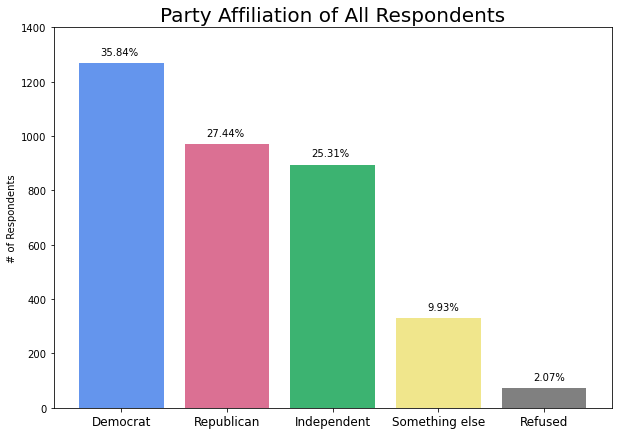

In [124]:
pew[["party"]].value_counts()
party_nums = [1267, 970, 895, 330, 73]
party_resp = ["Democrat",
          "Republican",
          "Independent",
          "Something else",
          "Refused"]
plt.figure(figsize = (10,7))
plt.ylim([0,1400])
plt.bar(party_resp, party_nums, color = ["cornflowerblue", "palevioletred", "mediumseagreen", "khaki", "grey"])
plt.title("Party Affiliation of All Respondents", fontsize = 20)
plt.ylabel("# of Respondents")
plt.xticks(fontsize = 12)
plt.text(-0.2, 1297, "35.84%", color = "black")
plt.text(0.8, 1000, "27.44%", color = "black")
plt.text(1.8, 925, "25.31%", color = "black")
plt.text(2.9, 360, "9.93%", color = "black")
plt.text(3.9, 103, "2.07%", color = "black")
plt.show()

### **9.	(1 points) Write a one-sentence summary of the visualization above.  What is something interesting about the variable that the visualization highlights?**

Over one-third of survey participants identified as Democratic, just over half as Republican or Independent, and over 10% as something else/refused. 

### **10.	(2 points) Create one bivariate relationship that shows the relationship between the two variables used above (e.g. scatter plot, side-by-side bar plot, line graph).**

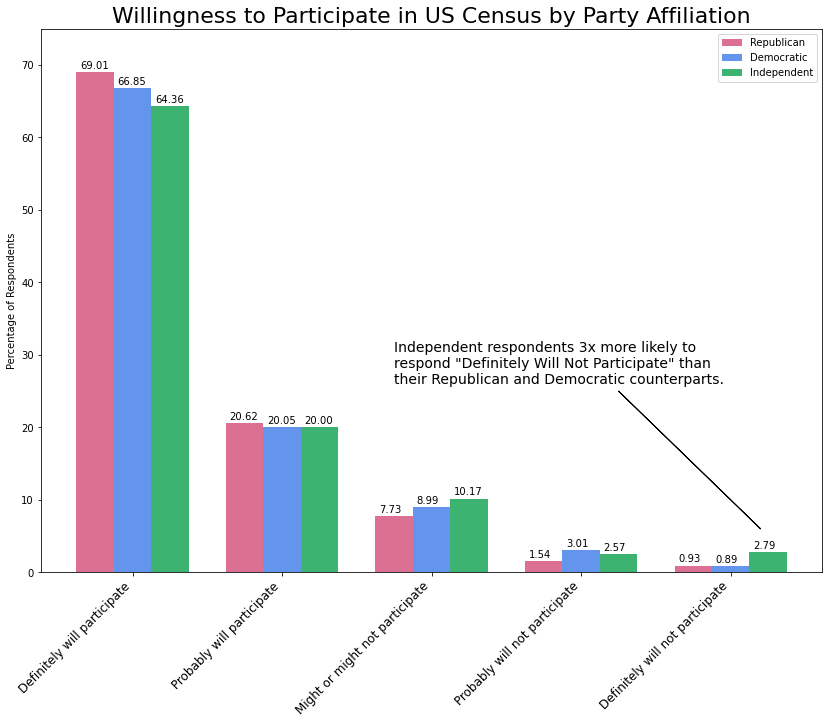

In [125]:
pew[["party"]].value_counts()

definitely = pew.loc[pew["partic"] == 1]
definitely[["party"]].value_counts()
670 / 970
847 / 1267
576 / 895

probably = pew.loc[pew["partic"] == 2]
probably[["party"]].value_counts()
200 / 970
254 / 1267
179 / 895

might = pew.loc[pew["partic"] == 3]
might[["party"]].value_counts()
75 / 970
114 / 1267
91 / 895

prob_not = pew.loc[pew["partic"] == 4]
prob_not[["party"]].value_counts()
15 / 970
39 / 1267
23 / 895

def_not = pew.loc[pew["partic"] == 5]
def_not[["party"]].value_counts()
9 / 970
11 / 1267
25 / 895

barWidth = 0.25

rep = [69.01, 20.62, 7.73, 1.54, 0.93]
dem = [66.85, 20.05, 8.99, 3.01, 0.89]
ind = [64.36, 20.00, 10.17, 2.57, 2.79]


r1 = np.arange(len(rep))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


plt.figure(figsize = (14,10))
plt.bar(r1, rep, color = "palevioletred", width = barWidth, label = "Republican")
plt.bar(r2, dem, color = "cornflowerblue", width = barWidth, label = "Democratic")
plt.bar(r3, ind, color = "mediumseagreen", width = barWidth, label = "Independent")
plt.ylim([0,75])

plt.ylabel("Percentage of Respondents")
plt.title('Willingness to Participate in US Census by Party Affiliation', fontsize = 22)
plt.xticks(ticks = [r + barWidth for r in range(len(rep))], labels = ["Definitely will participate",
          "Probably will participate",
          "Might or might not participate",
          "Probably will not participate",
          "Definitely will not participate"], rotation = 45, fontsize = 12, ha = "right")
plt.text(-0.1, 69.51, "69.01", color = "black", fontsize = 10)
plt.text(0.15, 67.35, "66.85", color = "black", fontsize = 10)
plt.text(0.40, 64.85, "64.36", color = "black", fontsize = 10)
plt.text(0.9, 21.12, "20.62", color = "black", fontsize = 10)
plt.text(1.15, 20.55, "20.05", color = "black", fontsize = 10)
plt.text(1.40, 20.50, "20.00", color = "black", fontsize = 10)
plt.text(1.90, 8.23, "7.73", color = "black", fontsize = 10)
plt.text(2.15, 9.49, "8.99", color = "black", fontsize = 10)
plt.text(2.40, 10.67, "10.17", color = "black", fontsize = 10)
plt.text(2.90, 2.04, "1.54", color = "black", fontsize = 10)
plt.text(3.15, 3.51, "3.01", color = "black", fontsize = 10)
plt.text(3.40, 3.07, "2.57", color = "black", fontsize = 10)
plt.text(3.90, 1.43, "0.93", color = "black", fontsize = 10)
plt.text(4.15, 1.39, "0.89", color = "black", fontsize = 10)
plt.text(4.40, 3.29, "2.79", color = "black", fontsize = 10)
plt.text(2, 26, 'Independent respondents 3x more likely to \nrespond "Definitely Will Not Participate" than \ntheir Republican and Democratic counterparts.', fontsize = 14)
plt.arrow(3.5, 25, 0.95, -19, shape = "right")

plt.legend()
plt.show()


### **11.	(1 points) Write a one-sentence summary of the visualization above.  What is something interesting about the relationship that the visualization highlights?**

Independents are the most skeptical about participating in the US Census and lead the "might or might not" and "definitely will not" categories -- however, overall, party affiliation still appears to have only marginal impact on respondents' likelihood to participate in the US Census. 

## Part 3: Regression Analysis

### **12.  (5 points) Run a bivariate regression model that includes your dependent variable and one independent variable of interest.**

In [139]:
pew_dummy = pd.get_dummies(pew["party"])
pew_dummy = pd.concat([pew, pew_dummy], axis = 1)
pew_dummy.drop(["party",1, 3, 4, 5], inplace = True, axis = 1)
# Dem or Rep only, 0 = Rep, 1 = Dem
pew_dummy = pew_dummy.rename(columns = {2: "dem"})

reg = smf.ols("partic ~ dem", data = pew_dummy)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 partic   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     14.60
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           0.000135
Time:                        19:46:36   Log-Likelihood:                -4922.6
No. Observations:                3535   AIC:                             9849.
Df Residuals:                    3533   BIC:                             9862.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6459      0.020     80.460      0.000       1.606       1.686
dem           -0.1306      0.034     -3.821      0.000      -0.198      -0.064
==============================================================================
Omnibus:                     1303.055   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4202.371
Skew:                           1.906   Prob(JB):                         0.00
Kurtosis:                       6.742   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Run a multivariate regression model that includes your dependent variable, one or more independent variables of interest and at least one control variable.**

In [140]:
reg2 = smf.ols("partic ~ dem + import_us + import_you + import_comm", data = pew_dummy)
results2 = reg2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 partic   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     649.2
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:46:39   Log-Likelihood:                -3955.3
No. Observations:                3535   AIC:                             7921.
Df Residuals:                    3530   BIC:                             7951.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1873      0.042      4.410      0.000       0.104       0.271
dem             0.0206      0.026      0.782      0.434      -0.031       0.072
import_us       0.7678      0.021     36.420      0.000       0.727       0.809
import_you      0.0202      0.015      1.322      0.186      -0.010       0.050
import_comm     0.1910      0.016     11.954      0.000       0.160       0.222
==============================================================================
Omnibus:                     1114.941   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7141.596
Skew:                           1.344   Prob(JB):                         0.00
Kurtosis:                       9.423   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Complete Table 3 with your regression results.  List the independent variables (using meaningful variable names) in the first column.  Include your bivariate model results in the second column and the multivariate model results in the third column.  For each variable, list the estimated coefficient and the estimated standard error beneath in parentheses.  Include only two digits beyond the decimal point.**

| Independent Variable | Bivariate Model | Multivariate Model |
| :--- | :--- | :--- |
| dem | -0.13 | 0.02 |
| | (0.03) | (0.03) |
| import_us | | 0.77 |
| | | (0.02) |
| import_you | | 0.02 |
| | | (0.02) |
| import_comm | | 0.19 |
| | |  (0.02) |

### **13.	(3 points) Explain your justification for one of the control variables that you chose to include in the multivariate model.**

One could hypothesize how important an individual deems the US Census to be for the United States, them personally, and/or their communities would influence their willingness to participate in said Census. For this reason, I included "import_us", "import_you", and "import_comm" as control variables. By controlling for how important an individual believes the Census is, the real impact (or lack thereof) of party affiliation becomes clearer. 

### **14.	(2 points) Interpret the coefficient on the independent variable of interest in the bivariate model.**

We can associate democratic party affiliation with a -0.13 change in willingness to participate in the US Census.*

*For the purposes of this analysis, willingness to participate in US Census ranges from 1 (high) to 5 (low).

### **15.	(2 points) Interpret the coefficient on the independent variable of interest in the multivariate model.**

We can associate democratic party affiliation with a 0.02 change in willingness to participate in the US Census.*

*For the purposes of this analysis, willingness to participate in US Census ranges from 1 (high) to 5 (low).

### **16.	(2 points) Conduct a hypothesis test on the independent variable of interest in the multivariate model.  State the null hypothesis, alternative hypothesis, t-score and result of the test.**

In [141]:
hypotheses = "dem"
t_test = results2.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0206      0.026      0.782      0.434      -0.031       0.072


* H0: There is not a statistically significant relationship betwween an individual's party affiliation and their willingness to participate in the US Census. 
* HA: There is a statistically significant relationship betwween an individual's party affiliation and their willingness to participate in the US Census. 
* t-score: 0.782
* Result of the test: Retain the null hypothesis. 

### **17.	(1 points) In a few sentences, describe your overall findings from your analysis.**

While over 15% of Pew Research Center's Survey respondents "might not", "probably will not", or "definitely will not" participate in the US Census, party affiliation does not have a statistically significant influence on this attitude. Further analysis is required to determine what other potential variables may have an impact. A few areas to explore include ethnicity, citizenship, education, age, what individual believe the US Census is used for, and self-perceived importance of the US Census. 